In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('results.csv')
data = data.sort_values(by = ['name', 'hour', 'ts', 'highest'])

In [15]:
# Some stocks had multiple same highest high during an hour, so select the first occurrence
data = data.groupby(['name', 'hour']).first().reset_index()

In [16]:
data.head()

,name,hour,highest,ts
0,BYND,9,137.970001,2020-05-14 09:39:00-04:00
1,BYND,10,139.559998,2020-05-14 10:31:00-04:00
2,BYND,11,141.000000,2020-05-14 11:15:00-04:00
3,BYND,12,138.240005,2020-05-14 12:57:00-04:00
4,BYND,13,137.789902,2020-05-14 13:00:00-04:00


## Histogram of Facebook Hourly Highest High Stock Prices on May 14th, 2020

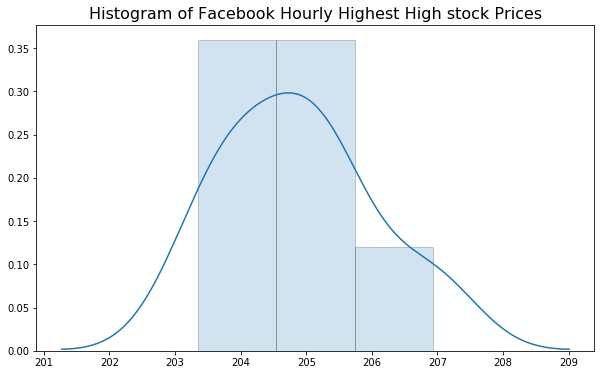

In [29]:
datafb = data[data['name'] == 'FB']
fig, ax = plt.subplots(figsize = (10, 6))
sns.distplot(datafb['highest'], ax = ax, hist_kws = {'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.2})
ax.set_title("Histogram of Facebook Hourly Highest High stock Prices", fontsize = 16)
ax.set_xlabel('')

plt.show()

## Line Plot of Netflix Hourly Highest High Stock Prices

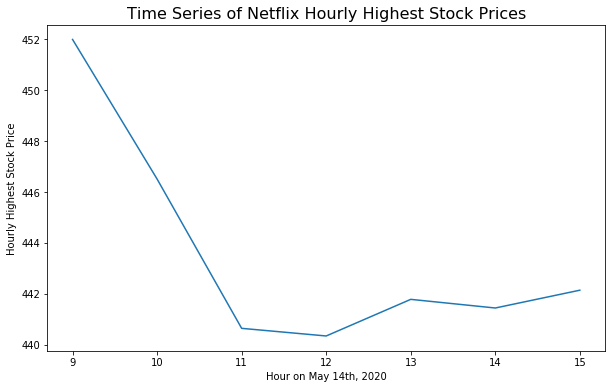

In [22]:
datanf = data[data['name'] == 'NFLX']
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(x = 'hour', y = 'highest', data = datanf, ax = ax)
ax.set_title("Time Series of Netflix Hourly Highest Stock Prices", fontsize = 16)
ax.set_xlabel('Hour on May 14th, 2020')
ax.set_ylabel('Hourly Highest Stock Price')

plt.show()

## Highest High Prices for Selected Stocks on May 14th, 2020

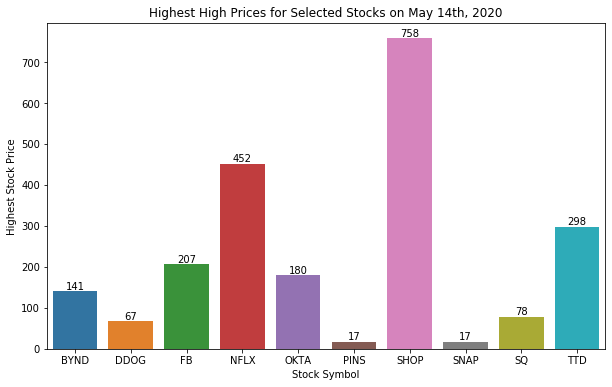

In [25]:
groupmax = data.groupby(['name'])[['highest']].max().reset_index()

fig, ax = plt.subplots(figsize = (10, 6))
splot = sns.barplot(x = 'name', y = 'highest', data = groupmax, ax = ax, ci = None)
ax.set_title("Highest High Prices for Selected Stocks on May 14th, 2020")
ax.set_xlabel('Stock Symbol')
ax.set_ylabel('Highest Stock Price')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

## Standard Deviation of Hourly Highest High Prices for Selected Stocks on May 14th, 2020

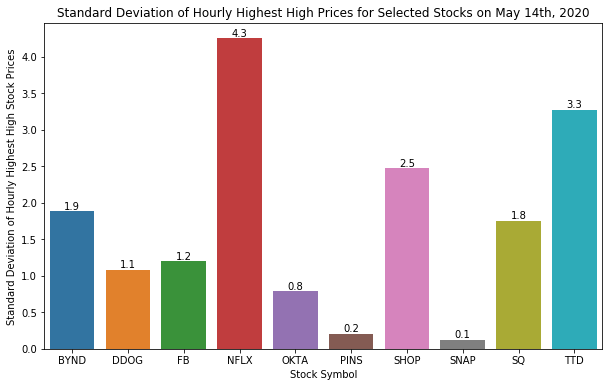

In [27]:
groupmax = data.groupby(['name'])[['highest']].std().reset_index()

fig, ax = plt.subplots(figsize = (10, 6))
splot = sns.barplot(x = 'name', y = 'highest', data = groupmax, ax = ax, ci = None)
ax.set_title("Standard Deviation of Hourly Highest High Prices for Selected Stocks on May 14th, 2020")
ax.set_xlabel('Stock Symbol')
ax.set_ylabel('Standard Deviation of Hourly Highest High Stock Prices')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()